In [36]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.measure as measure
import scipy.ndimage as ndi

import image_utils
import line_utils

In [2]:
base_path = "/Users/zachcm/Documents/Projects/ExM_Nadja/01_Macros_Analysis/"
workbook = "20241008_septin2_tubulin.xlsx"
workbook_path = os.path.join(base_path, workbook)
toc = pd.read_excel(workbook_path, sheet_name="ToC + P-t-p", header=2)
toc = toc[~toc['Stage'].isna()]

In [3]:
dx, dy, dz = 0.09, 0.09, 1.0   # um

In [4]:
ml = toc.iloc[0]
ml

Stage                                                            RS
Label             20240719_NRK49FS2GFP_UExM_GFP-488_aTub-568_DAP...
Area                                                        12960.0
Mean                                                         206.99
X                                                             651.0
Y                                                            1033.0
Angle                                                      -112.212
Channel                                                         2.0
length                                                      518.475
X1                                                            224.0
X2                                                            307.0
dX (pxl)                                                       83.0
dX (µm)                                                    1.682432
EF                                                             4.44
Unnamed: 14                                     

In [5]:
image_directory = "/Volumes/Ries_Ewers/Septin2-GFP"

file_stub = os.path.splitext(ml["Label"])[0]

image_files = glob.glob(image_directory+"/*.nd")
for image_file in image_files:
    if file_stub in image_file:
        break
# image_file = "20240719_NRK49FS2GFP_UExM_GFP-488_aTub-568_DAPI_25min_01.nd"
image_path = os.path.join(image_directory, image_file)

In [47]:
im = image_utils.NDImage(image_path)

In [7]:
mean_proj_xy = im[:].mean(1).squeeze()
max_proj_xy = im[:].max(1).squeeze()
mean_proj_xz = im[:].mean(2).squeeze()
max_proj_xz = im[:].max(2).squeeze()

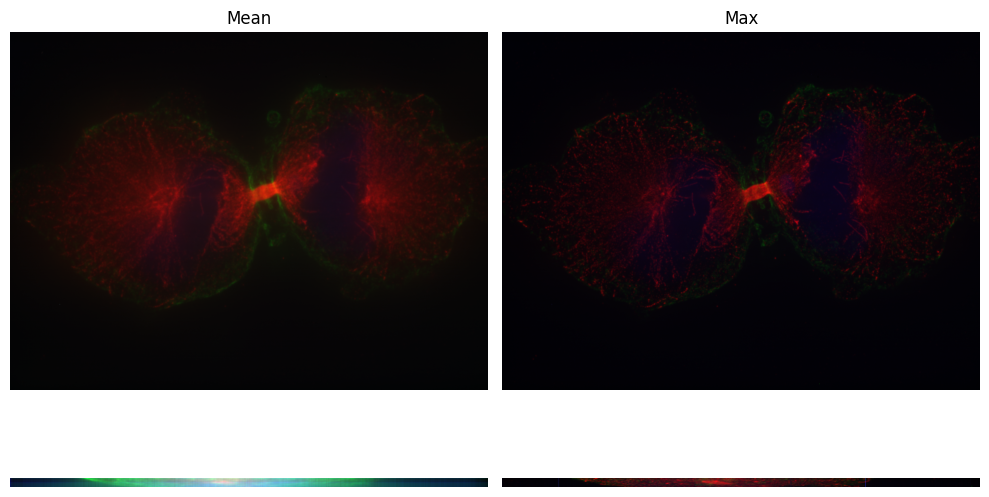

In [8]:
fig, axs = plt.subplots(2,2,figsize=(10,7))
axs[0,0].imshow(image_utils.normalize_image(mean_proj_xy))
axs[0,1].imshow(image_utils.normalize_image(max_proj_xy))
axs[1,0].imshow(image_utils.normalize_image(mean_proj_xz).transpose(1,0,2))
axs[1,1].imshow(image_utils.normalize_image(max_proj_xz).transpose(1,0,2))
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].set_title('Mean')
axs[0,1].set_title('Max')
fig.tight_layout()

In [48]:
im_rot = ndi.rotate(im[:], -ml["Angle"], axes=(2,1), reshape=False)

In [49]:
z_coord = line_utils.find_central_pos(im[:].max(2).squeeze(), ml["X"])
print(z_coord)

14.433388055255795


In [50]:
r, theta, z = image_utils.image_cylindrical_coordinates(im, ml["X"], ml["Y"], z_coord, 0)#, dx=0.09, dy=0.09, dz=1)

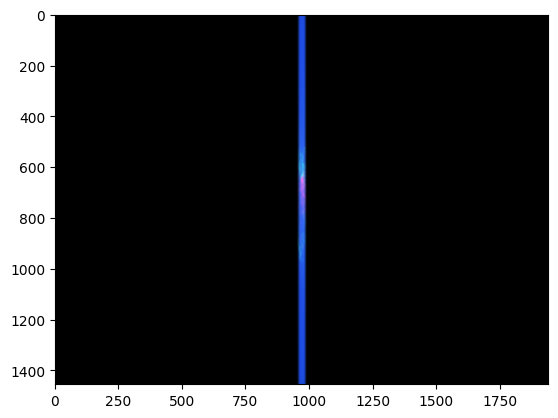

In [51]:
plt.imshow(image_utils.normalize_image(im_rot.mean(1)))

In [22]:
r, theta, z = image_utils.image_cylindrical_coordinates(im, ml["X"], ml["Y"], z_coord, ml["Angle"])#, dx=0.09, dy=0.09, dz=1)

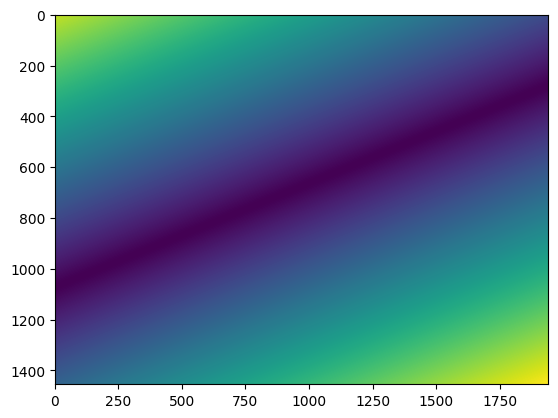

In [33]:
plt.imshow(r.max(0).T)

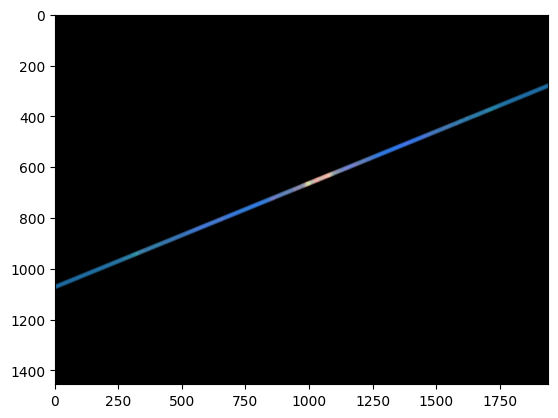

In [24]:
im_masked = (im[:]*(r<10)[None,...])
plt.imshow(image_utils.normalize_image(im_masked.mean(1)))

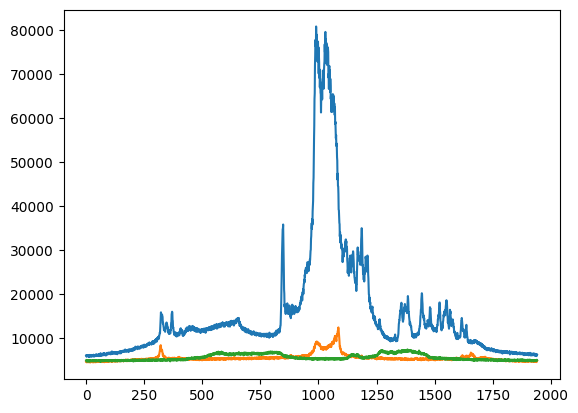

In [17]:
plt.plot(im_masked.sum(1).sum(-1).T)

In [14]:
x = ml["X"]

x = ml["X"]-ml["length"]/2


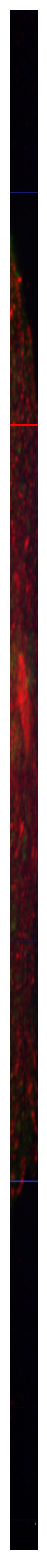

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
line_utils.imshow_with_profile(ax, max_proj_xz, x, x, 0, max_proj_xz.shape[1]-1)
